In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv('ElectionData.csv')
df 

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [26]:
df.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

# Feature Engineering

In [28]:
df[['Date', 'Time']] = df['time'].str.split(n=1, expand=True)
df['Time'] = df['Time'].str.split().str[-1]           # splitting Time into Date and Time
df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date,Time
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06,20:10:02
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06,20:10:02
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06,20:10:02
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06,20:10:02
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06,20:10:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,190712,NC,0,0.19,0.20,332,0,0,2019-10-07,00:35:01
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,190712,PNR,0,0.18,0.19,326,0,0,2019-10-07,00:35:01
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,190712,MPT,0,0.14,0.15,256,0,0,2019-10-07,00:35:01
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,190712,PTP,0,0.13,0.14,239,0,0,2019-10-07,00:35:01


In [29]:
df["Day"] = pd.to_datetime(df["Date"], format = '%Y/%m/%d').dt.day       #finding day of the month
df["Month"] = pd.to_datetime(df["Date"], format = '%Y/%m/%d').dt.month # finding month of the year
df["Year"] = pd.to_datetime(df["Date"], format = '%Y/%m/%d').dt.year  # Finding the year
df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date,Time,Day,Month,Year
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,38.29,40.22,147993,94,106,2019-10-06,20:10:02,6,10,2019
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,33.28,34.95,128624,81,77,2019-10-06,20:10:02,6,10,2019
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,6.81,7.15,26307,16,19,2019-10-06,20:10:02,6,10,2019
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,4.90,5.14,18923,12,5,2019-10-06,20:10:02,6,10,2019
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,4.59,4.83,17757,11,12,2019-10-06,20:10:02,6,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.19,0.20,332,0,0,2019-10-07,00:35:01,7,10,2019
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.18,0.19,326,0,0,2019-10-07,00:35:01,7,10,2019
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.14,0.15,256,0,0,2019-10-07,00:35:01,7,10,2019
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.13,0.14,239,0,0,2019-10-07,00:35:01,7,10,2019


In [30]:
df["Hours"] = pd.to_datetime(df["Time"], format = '%H:%M:%S').dt.hour      #finding hour of the day
df["Minutes"] = pd.to_datetime(df["Time"], format = '%H:%M:%S').dt.minute # finding minute of the hour
df["Seconds"] = pd.to_datetime(df["Time"], format = '%H:%M:%S').dt.second  # Finding second of the minute
df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,Hondt,FinalMandates,Date,Time,Day,Month,Year,Hours,Minutes,Seconds
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,94,106,2019-10-06,20:10:02,6,10,2019,20,10,2
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,81,77,2019-10-06,20:10:02,6,10,2019,20,10,2
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,16,19,2019-10-06,20:10:02,6,10,2019,20,10,2
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,12,5,2019-10-06,20:10:02,6,10,2019,20,10,2
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,11,12,2019-10-06,20:10:02,6,10,2019,20,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0,0,2019-10-07,00:35:01,7,10,2019,0,35,1
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0,0,2019-10-07,00:35:01,7,10,2019,0,35,1
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0,0,2019-10-07,00:35:01,7,10,2019,0,35,1
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0,0,2019-10-07,00:35:01,7,10,2019,0,35,1


In [31]:
df=df.drop(['time','Date','Time'],axis=1)   # columns not required as the new features are already extracted
df

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,validVotesPercentage,Votes,Hondt,FinalMandates,Day,Month,Year,Hours,Minutes,Seconds
0,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,40.22,147993,94,106,6,10,2019,20,10,2
1,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,34.95,128624,81,77,6,10,2019,20,10,2
2,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,7.15,26307,16,19,6,10,2019,20,10,2
3,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,5.14,18923,12,5,6,10,2019,20,10,2
4,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,4.83,17757,11,12,6,10,2019,20,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.20,332,0,0,7,10,2019,0,35,1
21639,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.19,326,0,0,7,10,2019,0,35,1
21640,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.15,256,0,0,7,10,2019,0,35,1
21641,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.14,239,0,0,7,10,2019,0,35,1


# Exploratory Data Analysis

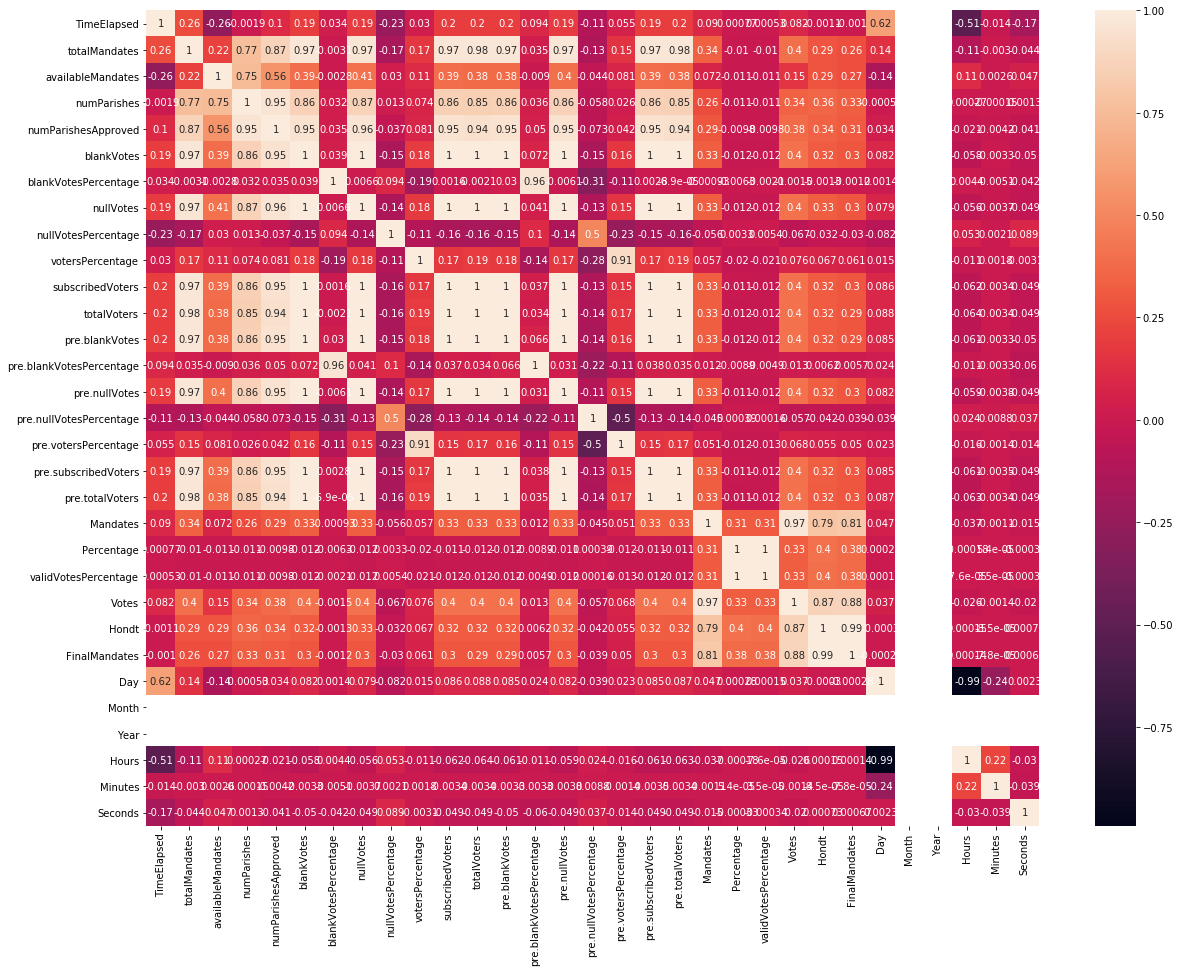

In [32]:
plt.figure(figsize=(20,15))               # here FinalMandates has a strong positive correlation to Votes, Mandates and Hondt 
sns.heatmap(df.corr(),annot=True)  

# Bivariate Analysis wrt Target - FinalMandates

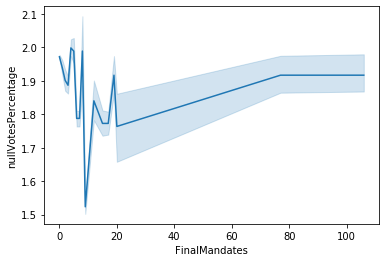

In [33]:
sns.lineplot(x='FinalMandates', y='nullVotesPercentage', data=df) 

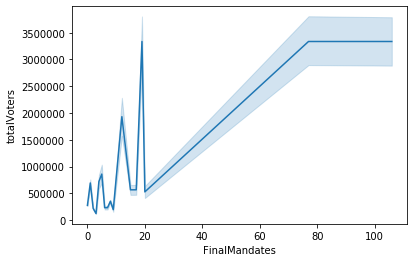

In [34]:
sns.lineplot(x='FinalMandates', y='totalVoters', data=df) 

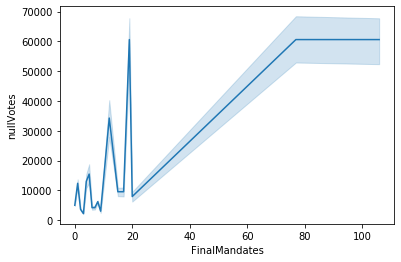

In [35]:
sns.lineplot(x='FinalMandates', y='nullVotes', data=df) 

# Conclusion from EDA(Exploratory Data Analysis)

1.The correlation between all the features of this dataset is strong

2.Votes, Mandates and FinalMandates are having strong correlation with 'Hondt' which is a method of election followed in Europe

3.NullVotes is positively correlated with FinalMandates & NullVotesPercentage is having somewhat a constant effect on FinalMandates 

# Data Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder                    #Applying label encoder 
lb=LabelEncoder()
df['territoryName']=pd.DataFrame(lb.fit_transform(df['territoryName'])) 
df['Party']=pd.DataFrame(lb.fit_transform(df['Party'])) 
df

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,validVotesPercentage,Votes,Hondt,FinalMandates,Day,Month,Year,Hours,Minutes,Seconds
0,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,40.22,147993,94,106,6,10,2019,20,10,2
1,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,34.95,128624,81,77,6,10,2019,20,10,2
2,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,7.15,26307,16,19,6,10,2019,20,10,2
3,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,5.14,18923,12,5,6,10,2019,20,10,2
4,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,4.83,17757,11,12,6,10,2019,20,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.20,332,0,0,7,10,2019,0,35,1
21639,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.19,326,0,0,7,10,2019,0,35,1
21640,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.15,256,0,0,7,10,2019,0,35,1
21641,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.14,239,0,0,7,10,2019,0,35,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   territoryName             21643 non-null  int32  
 2   totalMandates             21643 non-null  int64  
 3   availableMandates         21643 non-null  int64  
 4   numParishes               21643 non-null  int64  
 5   numParishesApproved       21643 non-null  int64  
 6   blankVotes                21643 non-null  int64  
 7   blankVotesPercentage      21643 non-null  float64
 8   nullVotes                 21643 non-null  int64  
 9   nullVotesPercentage       21643 non-null  float64
 10  votersPercentage          21643 non-null  float64
 11  subscribedVoters          21643 non-null  int64  
 12  totalVoters               21643 non-null  int64  
 13  pre.blankVotes            21643 non-null  int64  
 14  pre.bl

# Splitting the data into Target and Input variables

In [38]:
df_x=df.drop('FinalMandates',axis=1) 
df_x.head()   

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,Percentage,validVotesPercentage,Votes,Hondt,Day,Month,Year,Hours,Minutes,Seconds
0,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,38.29,40.22,147993,94,6,10,2019,20,10,2
1,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,33.28,34.95,128624,81,6,10,2019,20,10,2
2,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,6.81,7.15,26307,16,6,10,2019,20,10,2
3,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,4.90,5.14,18923,12,6,10,2019,20,10,2
4,0,16,0,226,3092,1081,9652,2.5,8874,2.3,...,4.59,4.83,17757,11,6,10,2019,20,10,2


In [39]:
y=pd.DataFrame(df.FinalMandates)
y.head() 

,FinalMandates
0,106
1,77
2,19
3,5
4,12


In [41]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,Percentage,validVotesPercentage,Votes,Hondt,Day,Month,Year,Hours,Minutes,Seconds
0,-1.714708,0.982968,-0.368680,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,0.902163,...,3.210250,3.217832,1.419284,14.757327,-0.418374,0.0,0.0,0.211491,-1.019971,1.005514
1,-1.714708,0.982968,-0.368680,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,0.902163,...,2.727578,2.733495,1.211248,12.691673,-0.418374,0.0,0.0,0.211491,-1.019971,1.005514
2,-1.714708,0.982968,-0.368680,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,0.902163,...,0.177415,0.178549,0.112293,2.363404,-0.418374,0.0,0.0,0.211491,-1.019971,1.005514
3,-1.714708,0.982968,-0.368680,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,0.902163,...,-0.006598,-0.006179,0.032984,1.727818,-0.418374,0.0,0.0,0.211491,-1.019971,1.005514
4,-1.714708,0.982968,-0.368680,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,0.902163,...,-0.036464,-0.034669,0.020460,1.568922,-0.418374,0.0,0.0,0.211491,-1.019971,1.005514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.698068,1.484214,-0.113202,-0.362319,-0.050006,0.027272,-0.180599,0.236864,-0.166138,0.315874,...,-0.460367,-0.460187,-0.166696,-0.178939,2.390207,0.0,0.0,-2.369889,0.483955,-0.994517
21639,1.698068,1.484214,-0.113202,-0.362319,-0.050006,0.027272,-0.180599,0.236864,-0.166138,0.315874,...,-0.461330,-0.461106,-0.166761,-0.178939,2.390207,0.0,0.0,-2.369889,0.483955,-0.994517
21640,1.698068,1.484214,-0.113202,-0.362319,-0.050006,0.027272,-0.180599,0.236864,-0.166138,0.315874,...,-0.465184,-0.464783,-0.167513,-0.178939,2.390207,0.0,0.0,-2.369889,0.483955,-0.994517
21641,1.698068,1.484214,-0.113202,-0.362319,-0.050006,0.027272,-0.180599,0.236864,-0.166138,0.315874,...,-0.466147,-0.465702,-0.167695,-0.178939,2.390207,0.0,0.0,-2.369889,0.483955,-0.994517


In [43]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


# Applying Machine Learning Models and finding out which Model works best 

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(0,101):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)   
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

In [45]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()                                            # Applying Linear Regression
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  0 is 0.9933603675603105
r2 score corresponding to  1 is 0.990839297509276
r2 score corresponding to  2 is 0.992255103234636
r2 score corresponding to  3 is 0.9916663989083527
r2 score corresponding to  4 is 0.9920826414976407
r2 score corresponding to  5 is 0.9910532388266892
r2 score corresponding to  6 is 0.9906916805589642
r2 score corresponding to  7 is 0.9920620818865757
r2 score corresponding to  8 is 0.9930163592031755
r2 score corresponding to  9 is 0.9937656426215823
r2 score corresponding to  10 is 0.9943742150133954
r2 score corresponding to  11 is 0.9938326419917837
r2 score corresponding to  12 is 0.9929924670497808
r2 score corresponding to  13 is 0.9925694175730285
r2 score corresponding to  14 is 0.9933940327145773
r2 score corresponding to  15 is 0.9940699519528456
r2 score corresponding to  16 is 0.992919908202848
r2 score corresponding to  17 is 0.9933684094229658
r2 score corresponding to  18 is 0.9921878277627459
r2 score corresponding to

In [46]:
from xgboost import XGBRegressor 

In [47]:
xgbr=XGBRegressor()
r_state=maxr2_score(xgbr,x,y)                     # Applying XGBoost Regressor

r2 score corresponding to  0 is 0.9999550545123803
r2 score corresponding to  1 is 0.9999678559274845
r2 score corresponding to  2 is 0.9999498478737512
r2 score corresponding to  3 is 0.9999829065984451
r2 score corresponding to  4 is 0.9999657263151954
r2 score corresponding to  5 is 0.9999777495548794
r2 score corresponding to  6 is 0.999968260813456
r2 score corresponding to  7 is 0.9999310729701946
r2 score corresponding to  8 is 0.9999549943585129
r2 score corresponding to  9 is 0.9999820728170982
r2 score corresponding to  10 is 0.9999807058377114
r2 score corresponding to  11 is 0.9999297019959881
r2 score corresponding to  12 is 0.9999791469396822
r2 score corresponding to  13 is 0.9999867295701124
r2 score corresponding to  14 is 0.9999872819206181
r2 score corresponding to  15 is 0.9999600186409663
r2 score corresponding to  16 is 0.9999806952037968
r2 score corresponding to  17 is 0.9999727776293165
r2 score corresponding to  18 is 0.9999760039887912
r2 score corresponding 

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,11)}
knr=KNeighborsRegressor() 
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y) 
gknr.best_params_

{'n_neighbors': 4}

In [49]:
knr=KNeighborsRegressor(n_neighbors=3)  # Applying KNeighbors Regressor
r_state=maxr2_score(knr,x,y) 

r2 score corresponding to  0 is 0.9968908335610249
r2 score corresponding to  1 is 0.9919750551374423
r2 score corresponding to  2 is 0.9976061165305253
r2 score corresponding to  3 is 0.9962307035923481
r2 score corresponding to  4 is 0.9947447307232145
r2 score corresponding to  5 is 0.9957353294331395
r2 score corresponding to  6 is 0.9936447665661889
r2 score corresponding to  7 is 0.9967268849294828
r2 score corresponding to  8 is 0.9926845452607642
r2 score corresponding to  9 is 0.9934149332828021
r2 score corresponding to  10 is 0.9962167467285237
r2 score corresponding to  11 is 0.9954289383295867
r2 score corresponding to  12 is 0.9978205682023316
r2 score corresponding to  13 is 0.9928493121650492
r2 score corresponding to  14 is 0.9957745287399882
r2 score corresponding to  15 is 0.9973807889728586
r2 score corresponding to  16 is 0.9963523271374527
r2 score corresponding to  17 is 0.9968426848853141
r2 score corresponding to  18 is 0.9911516435826297
r2 score corresponding

In [50]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
g_lsreg = GridSearchCV(lsreg, parameters, cv=5)
g_lsreg.fit(x,y)
g_lsreg.best_params_

{'alpha': 0.01}

In [51]:
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)            # Applying Lasso Regression

r2 score corresponding to  0 is 0.9926414505728601
r2 score corresponding to  1 is 0.9897825531830055
r2 score corresponding to  2 is 0.9927272599499789
r2 score corresponding to  3 is 0.9918900715579034
r2 score corresponding to  4 is 0.9914262547732539
r2 score corresponding to  5 is 0.9900235929352234
r2 score corresponding to  6 is 0.9904560650055468
r2 score corresponding to  7 is 0.9911424380167214
r2 score corresponding to  8 is 0.9927231289710492
r2 score corresponding to  9 is 0.992887292779419
r2 score corresponding to  10 is 0.9935114081623977
r2 score corresponding to  11 is 0.9938409512187215
r2 score corresponding to  12 is 0.9926753239928318
r2 score corresponding to  13 is 0.9924521699077468
r2 score corresponding to  14 is 0.9932751765030791
r2 score corresponding to  15 is 0.9940411782828726
r2 score corresponding to  16 is 0.9921224027933281
r2 score corresponding to  17 is 0.9926254627895417
r2 score corresponding to  18 is 0.991689232244875
r2 score corresponding t

In [52]:
from sklearn.linear_model import Ridge
rireg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
g_rireg = GridSearchCV(rireg, parameters, cv=5)
g_rireg.fit(x,y)
g_rireg.best_params_

{'alpha': 1}

In [53]:
rireg=Ridge(alpha=1)
r_state=maxr2_score(rireg,x,y)    # Applying Ridge Regression

r2 score corresponding to  0 is 0.9933587156844944
r2 score corresponding to  1 is 0.9908439287485069
r2 score corresponding to  2 is 0.9922759402583988
r2 score corresponding to  3 is 0.9916743456929688
r2 score corresponding to  4 is 0.9920838475069951
r2 score corresponding to  5 is 0.9910510776625314
r2 score corresponding to  6 is 0.9907142652168655
r2 score corresponding to  7 is 0.9920692296941094
r2 score corresponding to  8 is 0.9930212797179422
r2 score corresponding to  9 is 0.9937621006048207
r2 score corresponding to  10 is 0.994374594120877
r2 score corresponding to  11 is 0.9938446629139264
r2 score corresponding to  12 is 0.9929977138178474
r2 score corresponding to  13 is 0.992580967262309
r2 score corresponding to  14 is 0.9933965794619014
r2 score corresponding to  15 is 0.9940769392459577
r2 score corresponding to  16 is 0.9929163922393462
r2 score corresponding to  17 is 0.9933656392981655
r2 score corresponding to  18 is 0.992186545013209
r2 score corresponding to

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]} 
g_enr = GridSearchCV(enr, parameters, cv=5)
g_enr.fit(x,y)
g_enr.best_params_

{'alpha': 0.01}

In [55]:
enr=ElasticNet(alpha=0.1)
r_state=maxr2_score(enr,x,y)         # Applying ElasticNet Regression

r2 score corresponding to  0 is 0.9872748156162903
r2 score corresponding to  1 is 0.9791352589283551
r2 score corresponding to  2 is 0.990682271528444
r2 score corresponding to  3 is 0.9836318698354297
r2 score corresponding to  4 is 0.9825718578943387
r2 score corresponding to  5 is 0.9832264375255637
r2 score corresponding to  6 is 0.9860637947791173
r2 score corresponding to  7 is 0.9865704797188583
r2 score corresponding to  8 is 0.9849443162476841
r2 score corresponding to  9 is 0.9898297148008597
r2 score corresponding to  10 is 0.9874887554015856
r2 score corresponding to  11 is 0.9890908186591072
r2 score corresponding to  12 is 0.9822285636205647
r2 score corresponding to  13 is 0.9845607333076687
r2 score corresponding to  14 is 0.9873481784302937
r2 score corresponding to  15 is 0.9917530485765322
r2 score corresponding to  16 is 0.986603615160379
r2 score corresponding to  17 is 0.9851666926309098
r2 score corresponding to  18 is 0.9802447191706932
r2 score corresponding t

In [57]:
from sklearn import ensemble                                                # Applying AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg= AdaBoostRegressor()
ada_reg=AdaBoostRegressor(learning_rate=1,n_estimators=60) 
r_state=maxr2_score(ada_reg,x,y) 

r2 score corresponding to  0 is 0.9965569069470778
r2 score corresponding to  1 is 0.9953076060102564
r2 score corresponding to  2 is 0.9974610539930412
r2 score corresponding to  3 is 0.9962867086401771
r2 score corresponding to  4 is 0.99608948258642
r2 score corresponding to  5 is 0.9935666978823775
r2 score corresponding to  6 is 0.9944522563007147
r2 score corresponding to  7 is 0.9945143900132352
r2 score corresponding to  8 is 0.9973690488367022
r2 score corresponding to  9 is 0.9957969548061604
r2 score corresponding to  10 is 0.9963849072319235
r2 score corresponding to  11 is 0.9968531808000323
r2 score corresponding to  12 is 0.9973953932025975
r2 score corresponding to  13 is 0.9964903054091594
r2 score corresponding to  14 is 0.997674328207523
r2 score corresponding to  15 is 0.9969883159977606
r2 score corresponding to  16 is 0.996262022810861
r2 score corresponding to  17 is 0.9982300323517959
r2 score corresponding to  18 is 0.9959955412373007
r2 score corresponding to 

In [59]:
from sklearn.ensemble import GradientBoostingRegressor                        # Applying GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60) 
r_state=maxr2_score(gbr,x,y) 

r2 score corresponding to  0 is 0.9990070606907111
r2 score corresponding to  1 is 0.9979979232437644
r2 score corresponding to  2 is 0.9990466505372407
r2 score corresponding to  3 is 0.9990209267571328
r2 score corresponding to  4 is 0.9987998351013938
r2 score corresponding to  5 is 0.9985364059205006
r2 score corresponding to  6 is 0.9988664271927985
r2 score corresponding to  7 is 0.9988684534545845
r2 score corresponding to  8 is 0.9991391661122326
r2 score corresponding to  9 is 0.9988530477303149
r2 score corresponding to  10 is 0.9992486827153739
r2 score corresponding to  11 is 0.9992229464567067
r2 score corresponding to  12 is 0.9990006464883412
r2 score corresponding to  13 is 0.998987399194888
r2 score corresponding to  14 is 0.9992728648954871
r2 score corresponding to  15 is 0.9987407569678021
r2 score corresponding to  16 is 0.9987847952838119
r2 score corresponding to  17 is 0.9991010474481543
r2 score corresponding to  18 is 0.9987211406085807
r2 score corresponding 

In [61]:
#Here XGBoostRegressor is working best with accuract score 0.9999911426885567 so I am saving the model
import joblib
joblib.dump(xgbr, 'xgboostregressor_Election_Portugal.pkl')  

['xgboostregressor_Election_Portugal.pkl']